In [102]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [103]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [104]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/data engineering/project/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.submission_csv = args.default_path+'submission.csv'
args.submission_file = args.default_path+'submission_0304.csv'

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

In [105]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [756]:
train = pd.read_csv(args.train_csv)
print(f'{train.shape}')
train.head()

(916, 12)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [757]:
test = pd.read_csv(args.test_csv)
print(f'{test.shape}')
test.head()

(393, 11)


,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [758]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [759]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [760]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [761]:
ori_test.set_index(['passengerid'], inplace=True) 
print(f'{ori_test.shape}')
ori_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


# Split Dataset

In [762]:
from sklearn.model_selection import train_test_split

In [763]:
y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [764]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.3, random_state = args.random_state)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

In [765]:
train = X_tr.copy() 
test = X_te.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((641, 10), (275, 10), (393, 10))

# Drop Values

In [766]:
train.drop('ticket', axis=1, inplace=True)
test.drop('ticket', axis=1, inplace=True)
ori_te.drop('ticket', axis=1, inplace=True)

# Missing Values

In [767]:
# train['age'].fillna(train['age'].median(), inplace=True)
# test['age'].fillna(train['age'].median(), inplace=True)
# ori_te['age'].fillna(train['age'].median(), inplace=True)
# train.head()

In [768]:
random_sampling= (train['age'].dropna().sample(train['age'].isnull().sum(), random_state=0))
random_sampling.index = train[lambda x : x['age'].isnull()].index
train.loc[train['age'].isnull(), 'age'] = random_sampling

random_sampling = (train['age'].dropna().sample(test['age'].isnull().sum(), random_state=0))
random_sampling.index = test[lambda x : x['age'].isnull()].index
test.loc[test['age'].isnull(), 'age'] = random_sampling

random_sampling = (train['age'].dropna().sample(ori_te['age'].isnull().sum(), random_state=0))
random_sampling.index = ori_te[lambda x : x['age'].isnull()].index
ori_te.loc[ori_te['age'].isnull(), 'age'] = random_sampling

In [769]:
embarked_mode = train['embarked'].mode().values[0]

test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

In [770]:
median_fare = train['fare'].median()

ori_te['fare'].fillna(median_fare, inplace=True)

# Feature Engineering

## add gender_pclass

In [771]:
train['gender_pclass'] = train.apply(lambda row : row['gender'] + '_' + str(row['pclass']), axis=1)
test['gender_pclass'] = test.apply(lambda row : row['gender'] + '_'  + str(row['pclass']), axis=1)
ori_te['gender_pclass'] = ori_te.apply(lambda row : row['gender']  +'_' + str(row['pclass']), axis=1)
train.head()

,pclass,name,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,NaN,S,female_3
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,NaN,Q,male_3
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,NaN,S,male_3
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,NaN,C,male_3
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,NaN,S,male_3


## add gender_sibsp

In [772]:
# train['gender_sibsp'] = train.apply(lambda row : row['gender'] + '_' + str(row['pclass']), axis=1)
# test['gender_sibsp'] = test.apply(lambda row : row['gender'] + '_'  + str(row['pclass']), axis=1)
# ori_te['gender_sibsp'] = ori_te.apply(lambda row : row['gender']  +'_' + str(row['pclass']), axis=1)
# train.head()

## add gender_parch

In [773]:
# train['gender_parch'] = train.apply(lambda row : row['gender'] + '_' + str(row['pclass']), axis=1)
# test['gender_parch'] = test.apply(lambda row : row['gender'] + '_'  + str(row['pclass']), axis=1)
# ori_te['gender_parch'] = ori_te.apply(lambda row : row['gender']  +'_' + str(row['pclass']), axis=1)
# train.head()

## add designation

In [774]:
dict_designation = {
    #성별 
    'Mr': '남성',
    'Master': '어린 남성',
    'Sir': '남성',
    'Miss': '미혼 여성',
    'Mrs': '기혼 여성',
    'Ms': '미혼/기혼 여성',
    'Lady': '숙녀',
    'Mlle': '아가씨',
    # 직업
    'Dr': '의사',
    'Rev': '목사',
    'Major': '계급',
    'Don': '교수',
    'Col': '군인',
    'Capt': '군인',
    # 귀족
    'Mme': '영부인',
    'Countess': '백작부인',
    'Jonkheer': '귀족'
}


def add_designation(name) :
    designation = 'unknown'
    for key in dict_designation.keys() :
        if key in name :
            designation = key
            break
    return designation

train['designation'] = train['name'].map(lambda x : add_designation(x))
test['designation'] = test['name'].map(lambda x : add_designation(x))
ori_te['designation'] = ori_te['name'].map(lambda x : add_designation(x))

train.head()

,pclass,name,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,NaN,S,female_3,Miss
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,NaN,Q,male_3,Mr
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,NaN,S,male_3,Mr
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,NaN,C,male_3,Mr
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,NaN,S,male_3,Mr


In [775]:
# 반복문 사용할 수 있을듯... 나중에 해보기 
train['designation'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                    ['Miss','Mrs','Miss','RespectMale','RespectMale','Noble','Noble','RespectMale','RespectMale','RespectMale','RespectMale','Noble','Mr','Mrs'],inplace=True) 
test['designation'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                    ['Miss','Mrs','Miss','RespectMale','RespectMale','Noble','Noble','RespectMale','RespectMale','RespectMale','RespectMale','Noble','Mr','Mrs'],inplace=True)
ori_te['designation'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                    ['Miss','Mrs','Miss','RespectMale','RespectMale','Noble','Noble','RespectMale','RespectMale','RespectMale','RespectMale','Noble','Mr','Mrs'],inplace=True)

train.head()

,pclass,name,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,NaN,S,female_3,Miss
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,NaN,Q,male_3,Mr
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,NaN,S,male_3,Mr
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,NaN,C,male_3,Mr
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,NaN,S,male_3,Mr


In [776]:
train['designation'].value_counts()

Mr             477
Miss           128
Master          22
RespectMale     14
Name: designation, dtype: int64

## add name_len_group

In [777]:
train['name_len'] = train['name'].map(lambda x : len(x))
test['name_len'] = test['name'].map(lambda x : len(x))
ori_te['name_len'] = ori_te['name'].map(lambda x : len(x))

train.head()

,pclass,name,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation,name_len
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,NaN,S,female_3,Miss,18
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,NaN,Q,male_3,Mr,19
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,NaN,S,male_3,Mr,17
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,NaN,C,male_3,Mr,24
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,NaN,S,male_3,Mr,15


In [778]:
train['name_len'].describe()

count    641.000000
mean      27.324493
std        9.477647
min       12.000000
25%       20.000000
50%       25.000000
75%       31.000000
max       82.000000
Name: name_len, dtype: float64

In [779]:
def name_len_group(name_len) :
  result = 0
  if name_len <=  20 :
    result = 0
  elif name_len > 20 and name_len <= 25 :
    result = 1
  elif name_len > 25 and name_len <= 31 :
    result = 2
  else :
    result = 3
  return result

In [780]:
train['name_len_group'] = train['name_len'].map(lambda x : name_len_group(x))
test['name_len_group'] = test['name_len'].map(lambda x : name_len_group(x))
ori_te['name_len_group'] = ori_te['name_len'].map(lambda x : name_len_group(x))

In [781]:
train.head()

,pclass,name,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation,name_len,name_len_group
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,NaN,S,female_3,Miss,18,0
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,NaN,Q,male_3,Mr,19,0
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,NaN,S,male_3,Mr,17,0
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,NaN,C,male_3,Mr,24,1
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,NaN,S,male_3,Mr,15,0


In [782]:
train.drop('name', axis=1, inplace=True)
test.drop('name', axis=1, inplace=True)
ori_te.drop('name', axis=1, inplace=True)

## add age_group

In [783]:
def age_group(age) :
  result = 0
  if age < 16 :
    result = 1
  else :
    result = 0
  return result 

train['age_group'] = train['age'].map(lambda x : age_group(x))
test['age_group'] = test['age'].map(lambda x : age_group(x))
ori_te['age_group'] = ori_te['age'].map(lambda x : age_group(x))
train.head()

,pclass,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation,name_len,name_len_group,age_group
812,3,female,22.0,0,0,7.7750,NaN,S,female_3,Miss,18,0,0
134,3,male,21.0,0,0,7.8208,NaN,Q,male_3,Mr,19,0,0
390,3,male,32.0,0,0,7.8542,NaN,S,male_3,Mr,17,0,0
305,3,male,11.0,0,0,18.7875,NaN,C,male_3,Mr,24,1,1
203,3,male,30.0,0,0,8.0500,NaN,S,male_3,Mr,15,0,0


In [784]:
# train.drop('age', axis=1, inplace=True)
# test.drop('age', axis=1, inplace=True)
# ori_te.drop('age', axis=1, inplace=True)

## add accompany

In [785]:
train['accompany'] = train['sibsp'] + train['parch']
test['accompany'] = test['sibsp'] + test['parch']
ori_te['accompany'] = ori_te['sibsp'] + ori_te['parch']
train.head()

,pclass,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation,name_len,name_len_group,age_group,accompany
812,3,female,22.0,0,0,7.7750,NaN,S,female_3,Miss,18,0,0,0
134,3,male,21.0,0,0,7.8208,NaN,Q,male_3,Mr,19,0,0,0
390,3,male,32.0,0,0,7.8542,NaN,S,male_3,Mr,17,0,0,0
305,3,male,11.0,0,0,18.7875,NaN,C,male_3,Mr,24,1,1,0
203,3,male,30.0,0,0,8.0500,NaN,S,male_3,Mr,15,0,0,0


## add family_size

In [786]:
def family(accompany) :
  result = 'alone'
  if accompany == 0 :
    result = 'alone'
  elif accompany >= 1 and accompany <= 3 :
    result = 'small'
  else :
    result = 'big'
  return result

train['family_size'] = train['accompany'].map(lambda x : family(x))
test['family_size'] = test['accompany'].map(lambda x : family(x))
ori_te['family_size'] = ori_te['accompany'].map(lambda x : family(x))

train.head()

,pclass,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation,name_len,name_len_group,age_group,accompany,family_size
812,3,female,22.0,0,0,7.7750,NaN,S,female_3,Miss,18,0,0,0,alone
134,3,male,21.0,0,0,7.8208,NaN,Q,male_3,Mr,19,0,0,0,alone
390,3,male,32.0,0,0,7.8542,NaN,S,male_3,Mr,17,0,0,0,alone
305,3,male,11.0,0,0,18.7875,NaN,C,male_3,Mr,24,1,1,0,alone
203,3,male,30.0,0,0,8.0500,NaN,S,male_3,Mr,15,0,0,0,alone


In [787]:
# train.drop(['sibsp','parch'], axis=1, inplace=True)
# test.drop(['sibsp','parch'], axis=1, inplace=True)
# ori_te.drop(['sibsp','parch'], axis=1, inplace=True)

## add fare_group

In [788]:
train['fare'].describe()

count    641.000000
mean      31.654446
std       49.827609
min        0.000000
25%        7.895800
50%       14.400000
75%       30.000000
max      512.329200
Name: fare, dtype: float64

In [789]:
def fare_group(fare) : 
  result = 0
  if fare <= 7.895800  :
    result = 0
  elif fare > 7.895800 and fare <= 14.458300 :
    result = 1
  elif fare > 14.458300 and fare <= 30.017700 :
    result = 2
  else :
    result = 3
  return result 

train['fare_group'] = train['fare'].map(lambda x : fare_group(x))
test['fare_group'] = test['fare'].map(lambda x : fare_group(x))
ori_te['fare_group'] = ori_te['fare'].map(lambda x : fare_group(x))

train.head()

,pclass,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation,name_len,name_len_group,age_group,accompany,family_size,fare_group
812,3,female,22.0,0,0,7.7750,NaN,S,female_3,Miss,18,0,0,0,alone,0
134,3,male,21.0,0,0,7.8208,NaN,Q,male_3,Mr,19,0,0,0,alone,0
390,3,male,32.0,0,0,7.8542,NaN,S,male_3,Mr,17,0,0,0,alone,0
305,3,male,11.0,0,0,18.7875,NaN,C,male_3,Mr,24,1,1,0,alone,2
203,3,male,30.0,0,0,8.0500,NaN,S,male_3,Mr,15,0,0,0,alone,1


## add fare_group_pclass

In [790]:
# train['fare_group_pclass'] = train.apply(lambda row : str(row['fare_group']) + '_' + str(row['pclass']), axis=1)
# test['fare_group_pclass'] = test.apply(lambda row : str(row['fare_group']) + '_'  + str(row['pclass']), axis=1)
# ori_te['fare_group_pclass'] = ori_te.apply(lambda row : str(row['fare_group'])  +'_' + str(row['pclass']), axis=1)
# train.head()

## add have_cabin

In [791]:
train['cabin'].unique()

array([nan, 'B20', 'B96 B98', 'B49', 'C65', 'B4', 'E10', 'B86',
       'B51 B53 B55', 'A34', 'E25', 'B50', 'A11', 'D50', 'A32', 'E101',
       'G6', 'C32', 'F G63', 'D28', 'C54', 'C87', 'C86', 'B73', 'B39',
       'B57 B59 B63 B66', 'E34', 'C31', 'C124', 'D', 'D38', 'B42', 'E46',
       'B78', 'D26', 'F E46', 'C92', 'C93', 'A19', 'C80', 'A5', 'D49',
       'E44', 'E50', 'B102', 'B22', 'C101', 'B80', 'D7', 'B36', 'A6',
       'B58 B60', 'D19', 'D17', 'C47', 'F', 'C23 C25 C27', 'B45', 'B35',
       'C123', 'E39 E41', 'D35', 'B37', 'B41', 'C83', 'C62 C64', 'B38',
       'B69', 'B26', 'C2', 'C148', 'C126', 'C51', 'F33', 'C130',
       'B52 B54 B56', 'E8', 'D40', 'D20', 'D11', 'A18', 'D48', 'E63',
       'E45', 'C53', 'D15', 'D33', 'C125', 'F2', 'C78', 'A24', 'C104',
       'E31', 'E33', 'F E57', 'C91', 'B5', 'A23', 'A21', 'C110',
       'C22 C26', 'C46', 'C55 C57', 'A20', 'E121', 'E36', 'D37', 'D36',
       'C106', 'E77', 'C7'], dtype=object)

In [792]:
train.cabin.isnull().sum()

506

In [793]:
train['cabin_first'] = train['cabin'].str[0]
test['cabin_first'] = test['cabin'].str[0]
ori_te['cabin_first'] = ori_te['cabin'].str[0]

train['cabin_first'].value_counts()

C    41
B    34
D    21
E    18
A    11
F     8
G     2
Name: cabin_first, dtype: int64

In [794]:
train['have_cabin'] = 1
train.loc[train['cabin'].isnull(),'have_cabin'] = 0

test['have_cabin'] = 1
test.loc[test['cabin'].isnull(),'have_cabin'] = 0

ori_te['have_cabin'] = 1
ori_te.loc[ori_te['cabin'].isnull(),'have_cabin'] = 0

train.head()

,pclass,gender,age,sibsp,parch,fare,cabin,embarked,gender_pclass,designation,name_len,name_len_group,age_group,accompany,family_size,fare_group,cabin_first,have_cabin
812,3,female,22.0,0,0,7.7750,NaN,S,female_3,Miss,18,0,0,0,alone,0,NaN,0
134,3,male,21.0,0,0,7.8208,NaN,Q,male_3,Mr,19,0,0,0,alone,0,NaN,0
390,3,male,32.0,0,0,7.8542,NaN,S,male_3,Mr,17,0,0,0,alone,0,NaN,0
305,3,male,11.0,0,0,18.7875,NaN,C,male_3,Mr,24,1,1,0,alone,2,NaN,0
203,3,male,30.0,0,0,8.0500,NaN,S,male_3,Mr,15,0,0,0,alone,1,NaN,0


In [795]:
train.drop('cabin', axis=1, inplace=True)
test.drop('cabin', axis=1, inplace=True)
ori_te.drop('cabin', axis=1, inplace=True)

# Scaling

In [796]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [797]:
scale = StandardScaler().fit(train[['fare']])

train['fare'] = scale.transform(train[['fare']])
test['fare'] = scale.transform(test[['fare']])
ori_te['fare'] = scale.transform(ori_te[['fare']])

In [798]:
scale = StandardScaler().fit(train[['age']])

train['age'] = scale.transform(train[['age']])
test['age'] = scale.transform(test[['age']])
ori_te['age'] = scale.transform(ori_te[['age']])

# One hot Encoding

In [799]:
from sklearn.preprocessing import OneHotEncoder

In [800]:
train.columns

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'gender_pclass', 'designation', 'name_len', 'name_len_group',
       'age_group', 'accompany', 'family_size', 'fare_group', 'cabin_first',
       'have_cabin'],
      dtype='object')

In [801]:
cols = ['pclass', 'gender', 'embarked', 'gender_pclass', 'designation', 'name_len', 'name_len_group',
       'age_group', 'accompany', 'family_size', 'fare_group','cabin_first', 'have_cabin', 'sibsp', 'parch']

In [802]:
# 다른 방식으로도 구현할 수 있을 것 같다...

print(f'before: {train.shape} / {test.shape}')

enc = OneHotEncoder(handle_unknown = 'ignore')

# train
tmp_tr = pd.DataFrame(
    enc.fit_transform(train[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_tr = pd.concat(
    [train.reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
)
# test
tmp_te = pd.DataFrame(
    enc.transform(test[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)

print(f'after: {enc_tr.shape} / {enc_te.shape}')
enc_tr.head()

before: (641, 17) / (275, 17)
after: (641, 130) / (275, 130)


,pclass,gender,age,sibsp,parch,fare,embarked,gender_pclass,designation,name_len,...,sibsp_5,sibsp_8,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,parch_9
0,3,female,-0.574672,0,0,-0.479616,S,female_3,Miss,18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,male,-0.642792,0,0,-0.478696,Q,male_3,Mr,19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,male,0.106527,0,0,-0.478025,S,male_3,Mr,17,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,male,-1.323992,0,0,-0.258431,C,male_3,Mr,24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,male,-0.029712,0,0,-0.474092,S,male_3,Mr,15,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [803]:
enc_tr.drop(cols, axis=1, inplace=True)
enc_te.drop(cols, axis=1, inplace=True)
enc_ori_te.drop(cols, axis=1, inplace=True)

enc_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Columns: 115 entries, age to parch_9
dtypes: float64(115)
memory usage: 576.0 KB


# Training

In [804]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_ori_te.isnull().sum().sum()

(0, 0, 0)

In [805]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusion(actual, pred):
  preds_1d = pred.flatten() # 차원 펴주기
  pred_class = np.where(preds_1d > 0.5, 1 , 0) 

  cm = confusion_matrix(actual, pred_class)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='PuBu')

## DecisionTreeClassifier

In [806]:
from sklearn.tree import DecisionTreeClassifier

In [807]:
dtc = DecisionTreeClassifier(random_state=args.random_state).fit(enc_tr, y_tr) 

print(f'훈련용 평가지표: {dtc.score(enc_tr, y_tr)} / 테스트용 평가지표: {dtc.score(enc_te, y_te)}')

훈련용 평가지표: 0.9984399375975039 / 테스트용 평가지표: 0.7418181818181818


In [808]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = dtc.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.7322593342330184


## LogisticRegression

In [809]:
from sklearn.linear_model import LogisticRegression

In [810]:
logreg = LogisticRegression(random_state=args.random_state).fit(enc_tr, y_tr)

print(f'훈련용 평가지표: {logreg.score(enc_tr, y_tr)} / 테스트용 평가지표: {logreg.score(enc_te, y_te)}')

훈련용 평가지표: 0.8814352574102964 / 테스트용 평가지표: 0.8763636363636363


In [811]:
y_pred_logreg = logreg.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_logreg)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.907051282051282


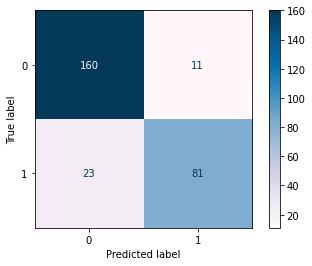

In [812]:
confusion(y_te, y_pred_logreg)

## RandomForest

In [813]:
from sklearn.ensemble import RandomForestClassifier 

In [814]:
forest = RandomForestClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(enc_tr, y_tr)} / 테스트용 평가지표: {forest.score(enc_te, y_te)}')

훈련용 평가지표: 0.9984399375975039 / 테스트용 평가지표: 0.8545454545454545


In [815]:
y_pred_forest = forest.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_forest)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8857962213225371


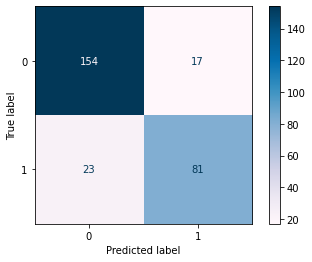

In [816]:
confusion(y_te, y_pred_forest)

## GradientBoostingClassifier

In [817]:
from sklearn.ensemble import GradientBoostingClassifier

In [818]:
gradient = GradientBoostingClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(enc_tr, y_tr)} / 테스트용 평가지표: {gradient.score(enc_te, y_te)}')

훈련용 평가지표: 0.9204368174726989 / 테스트용 평가지표: 0.8618181818181818


In [819]:
y_pred_gradient = gradient.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_gradient)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8891981556455241


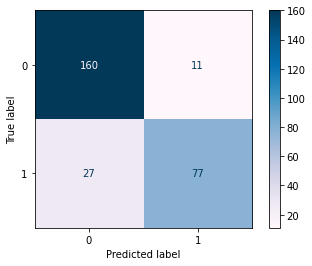

In [820]:
confusion(y_te, y_pred_gradient)

## XGBoost

In [821]:
from xgboost import XGBClassifier, plot_importance

In [822]:
xgb = XGBClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {xgb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {xgb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.9953198127925117 / 테스트용 평가지표 : 0.8145454545454546


In [823]:
y_pred_xgb = xgb.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_xgb)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8747188484030589


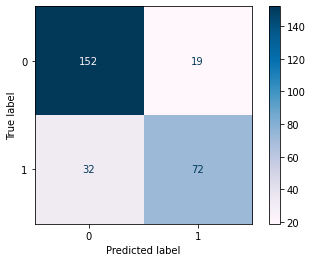

In [824]:
confusion(y_te, y_pred_xgb)

## LightGBM

In [825]:
from lightgbm import LGBMClassifier, plot_importance

In [826]:
lgb = LGBMClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {lgb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {lgb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.9890795631825273 / 테스트용 평가지표 : 0.8290909090909091


In [827]:
y_pred_lgb = lgb.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_lgb)
auc_te = auc(fpr, tpr)
print(auc_te)

0.8861336032388665


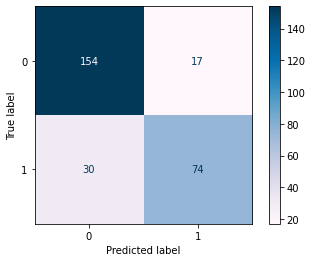

In [828]:
confusion(y_te, y_pred_lgb)

## Stratified K-Fold Validation

In [829]:
from sklearn.model_selection import StratifiedKFold

In [830]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=args.random_state)

In [831]:
n_iter = 0
auc_list = []
methods = [forest, gradient, xgb, lgb]

for method in methods :
  for train_index, valid_index in skf.split(enc_tr, y_tr) :
    n_iter += 1

    train_x, valid_x = enc_tr.iloc[train_index], enc_tr.iloc[valid_index]
    train_y, valid_y = y_tr.iloc[train_index], y_tr.iloc[valid_index]

    method.fit(enc_tr, y_tr)
    pred = method.predict(valid_x)

    fpr, tpr, thresholds = roc_curve(valid_y, pred)
    auc_te = auc(fpr, tpr)
    auc_list.append(auc_te)
  
  print(f'model : {method}')
  print(f'교차 검증 정확도 : {np.mean(auc_list)} / 모델 평가 : {method.score(enc_te, y_te)}')
  print('-'*50)

model : RandomForestClassifier(random_state=21)
교차 검증 정확도 : 0.9979166666666666 / 모델 평가 : 0.8545454545454545
--------------------------------------------------
model : GradientBoostingClassifier(random_state=21)
교차 검증 정확도 : 0.9531188646344614 / 모델 평가 : 0.8618181818181818
--------------------------------------------------
model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=No

## Bayesian Search 

In [832]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [833]:
import optuna
from sklearn.model_selection import cross_val_score

### TPESampler

In [834]:
from optuna.samplers import TPESampler
optuna.logging.disable_default_handler()

In [835]:
class Objective:
    def __init__(self, x_train ,y_train, seed):
        self.x_train = enc_tr
        self.y_train = y_tr
        self.seed = args.random_state
        num_folds = 5 
        self.cv = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=self.seed)

    def __call__(self, trial):

        hp = {
            "max_depth" : trial.suggest_int("max_depth",1, 6),
            "max_features" : trial.suggest_categorical("max_features",["auto", "sqrt", "log2"]),
            "n_estimators" : trial.suggest_int("n_estimators",10,500,50),
            "learning_rate" : trial.suggest_float("learning_rate",0.01,0.2)
        }

        forest =  RandomForestClassifier
        gradient = GradientBoostingClassifier
        xgb = XGBClassifier
        lgb = LGBMClassifier

        model = gradient(random_state=self.seed,**hp)
        scores = cross_val_score(model, self.x_train, self.y_train, cv = self.cv , scoring="roc_auc")
        return np.mean(scores)

In [836]:
sampler = TPESampler(seed=args.random_state) 

# 스터디 객체
study = optuna.create_study(
    direction = "maximize", # maximize or minimize
    sampler = sampler
)
objective = Objective(enc_tr, y_tr, args.random_state)
study.optimize(objective, n_trials=50)

print("Best Score:", study.best_value) 
print("Best hp", study.best_params) 

Best Score: 0.9079430514294324
Best hp {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 360, 'learning_rate': 0.010903960648058361}


In [837]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

In [839]:
model = GradientBoostingClassifier(random_state=args.random_state, **study.best_params)
model.fit(enc_tr, y_tr)

pred = model.predict_proba(enc_te)[:,1]
roc_auc_score(y_te, pred)

0.9071356275303644

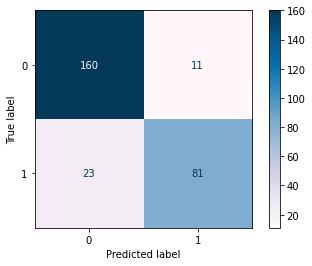

In [840]:
confusion(y_te, pred)

In [841]:
optuna.visualization.plot_param_importances(study)

## SHAP

In [842]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [843]:
import shap

In [844]:
explainer = shap.TreeExplainer(model) # 학습된 모델을 넣는다.
shap_values = explainer.shap_values(enc_te)

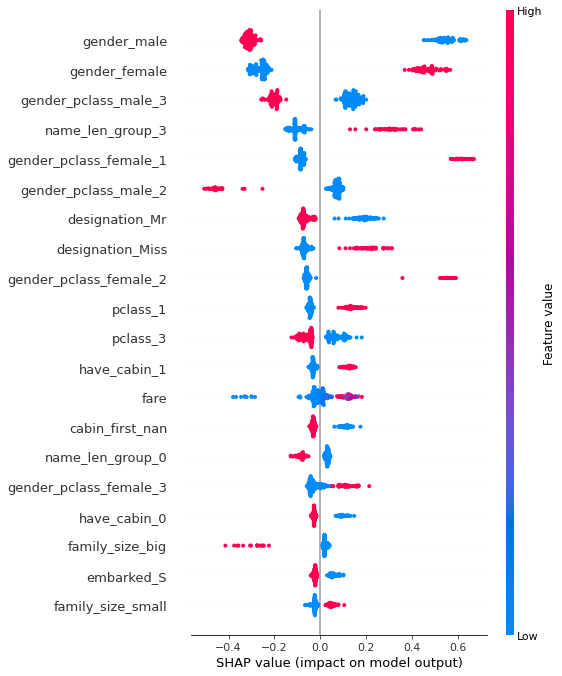

In [845]:
shap.summary_plot(shap_values, enc_te)

# Best Threshold

In [846]:
from sklearn.preprocessing import Binarizer

In [847]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import precision_recall_curve

In [848]:
pred_prob = model.predict_proba(enc_te)
lr_pred = model.predict(enc_te).reshape(-1,1)

temp = pd.DataFrame( np.concatenate([pred_prob, lr_pred], axis=1) )
temp.columns = ["Negative P", "Positive P", "predict"]
temp.head()

,Negative P,Positive P,predict
0,0.919286,0.080714,0.0
1,0.642702,0.357298,0.0
2,0.653591,0.346409,0.0
3,0.486019,0.513981,1.0
4,0.115890,0.884110,1.0


0.8505679262258209


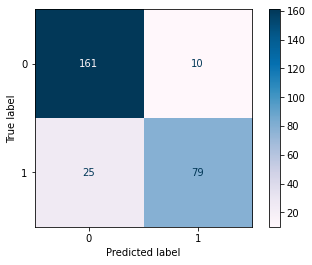

In [849]:
# threshold 설정
my_thres = 0.55

# Positive 확률
pred_proba_po = pred_prob[:,1].reshape(-1,1)

# Binarizer
binarizer = Binarizer(threshold = my_thres)
binarizer.fit(pred_proba_po)
my_pred = binarizer.transform(pred_proba_po)

# # 차원 변환
# my_pred = my_pred.flatten().reshape(-1, 1)
# y_te = np.array(y_te).reshape(-1, 1)

auc = roc_auc_score(y_te, my_pred)
print(auc)
confusion(y_te, my_pred)

In [850]:
from sklearn.metrics import classification_report

print(classification_report(y_te, my_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       171
           1       0.89      0.76      0.82       104

    accuracy                           0.87       275
   macro avg       0.88      0.85      0.86       275
weighted avg       0.87      0.87      0.87       275



In [851]:
pred_prob = model.predict_proba(enc_ori_te)
lr_pred = model.predict(enc_te).reshape(-1,1)
pred_proba_po = pred_prob[:,1].reshape(-1,1)

binarizer_model = Binarizer(threshold = my_thres)
binarizer_model.fit(pred_proba_po)
my_pred = binarizer_model.transform(pred_proba_po)


# Submission

In [852]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [853]:
test_pred = model.predict_proba(enc_ori_te)[:, 1]
test_pred.shape

(393,)

In [856]:
submission['survived'] = test_pred
submission

,passengerid,survived
0,916,0.720511
1,917,0.673789
2,918,0.792449
3,919,0.162907
4,920,0.876218
...,...,...
388,1304,0.763336
389,1305,0.924755
390,1306,0.729229
391,1307,0.551507


In [857]:
submission.to_csv(args.submission_file, header=True, index=False)